In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

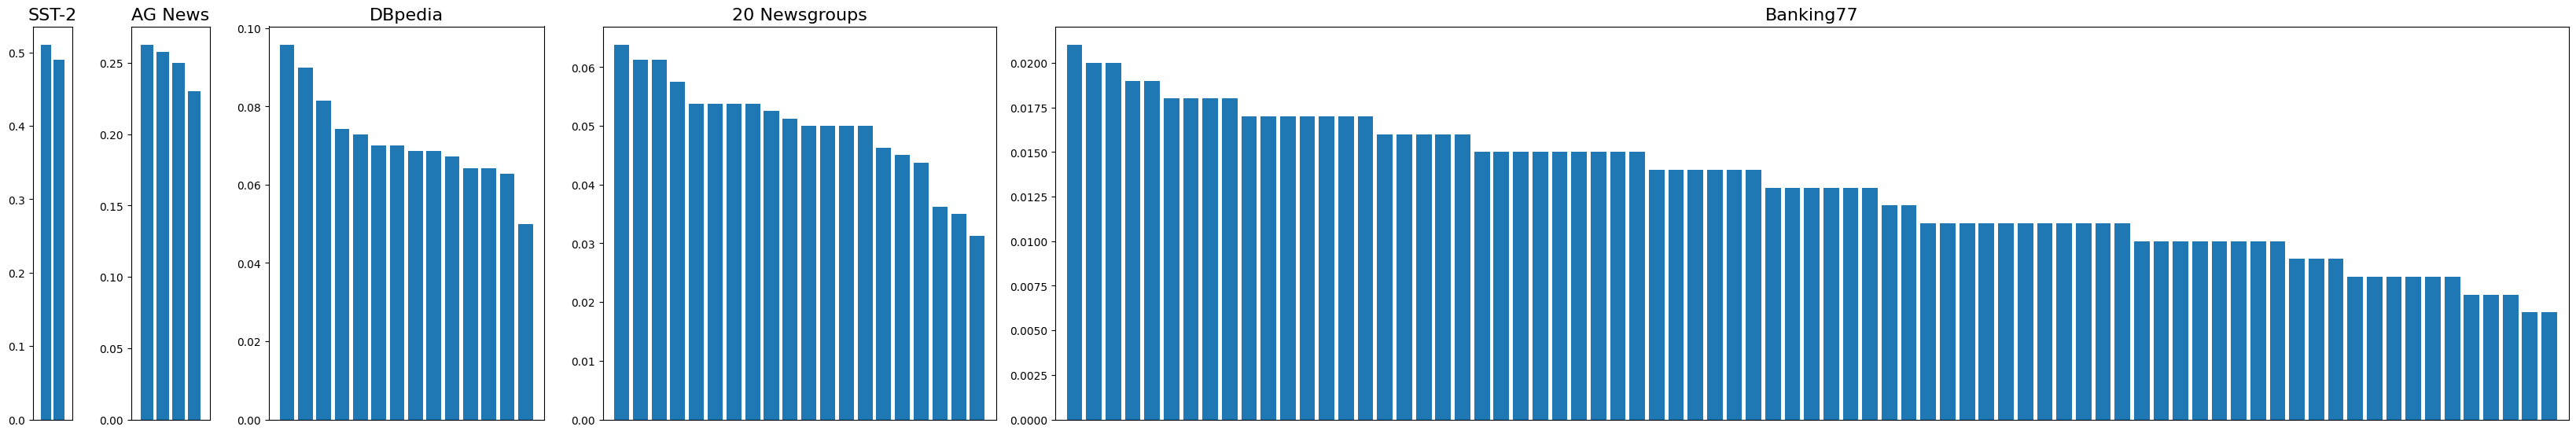

In [39]:
test_lists = {
    "sst2": "test_400",
    "agnews": "test_400",
    "dbpedia": "test_700",
    "20newsgroups": "test_800",
    "banking77": "test_1000",
}

dataset2name = {
    "sst2": "SST-2",
    "agnews": "AG News",
    "dbpedia": "DBpedia",
    "20newsgroups": "20 Newsgroups",
    "banking77": "Banking77",
}

def plot_priors(datasets):

    # fig, ax = plt.subplots(1, len(datasets), figsize=(5*len(datasets), 5))
    fig = plt.figure(figsize=(5*len(datasets), 5))
    cum_width = 0

    for i, dataset in enumerate(datasets):
        test_list = np.loadtxt(f"../lists/{dataset}/{test_lists[dataset]}.txt", dtype=int)
        df = pd.read_csv(f"../data/{dataset}/all.csv", header=0, index_col=0)
        labels = df.loc[:,"label"].values
        priors = np.bincount(labels[test_list]) / len(test_list)
        n_classes = priors.size
        
        width = n_classes / 100
        ax = fig.add_axes([cum_width, 0, width, 1])
        cum_width += width + 0.03
        ax.bar(range(len(priors)), np.sort(priors)[::-1])
        ax.set_title(dataset2name[dataset], fontsize=16)
        ax.set_xlim(-1, n_classes)
        ax.set_xticks([])
    
    # fig.suptitle("Prior Probabilities for each dataset sorted by number", fontsize=16, y=1.12)

    # plt.tight_layout()


plot_priors(["sst2", "agnews", "dbpedia", "20newsgroups", "banking77"])